In [10]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statistics import mean

In [11]:
# Define the ticker symbol
tickerSymbol = 'TQQQ'

# Get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

# Get the historical prices for this ticker
history = tickerData.history(interval='1wk', start='2021-1-1', end='2024-5-5')

In [12]:
print(f'{tickerSymbol} 1w O/L drawdown percentiles:')
for q in [0.1,0.2,0.5,0.8,0.9,0.95,0.98,0.99]:
    p = (history['Low'] / history['Open'] - 1).quantile(q)
    print(f'{q:3.0%}: {p:7.2%}')

TQQQ 1w O/L drawdown percentiles:
10%: -13.92%
20%: -10.20%
50%:  -4.90%
80%:  -1.40%
90%:  -0.54%
95%:  -0.28%
98%:  -0.10%
99%:  -0.06%


In [13]:
weeks = 1
option_leverage = 40
gap = (1/55)*100

print(f'period: {weeks} weeks')
print(f'option leverage: {option_leverage:.1f}')
print(f'option gap: {gap:.2f}%')
print(f'break even: {gap+100/option_leverage:.1f}%')

period: 1 weeks
option leverage: 40.0
option gap: 1.82%
break even: 4.3%


In [14]:
history['Stock Change'] = history['Close'].pct_change(periods=weeks) * 100
history['Option Profit'] = ((history['Stock Change'][weeks:] - gap) * option_leverage - 100).clip(lower=-100)

In [15]:
print(f'{tickerSymbol} {weeks}w option profit percentiles:')
for q in [0.5,0.8,0.9,0.95,0.98,0.99]:
    p = history['Option Profit'].quantile(q)
    print(f'{q:.0%}: {p:3.0f}%')

TQQQ 1w option profit percentiles:
50%: -100%
80%: 159%
90%: 286%
95%: 428%
98%: 609%
99%: 668%


In [16]:
history['Window Max'] = history['High'].rolling(window=pd.api.indexers.FixedForwardWindowIndexer(window_size=weeks)).max()


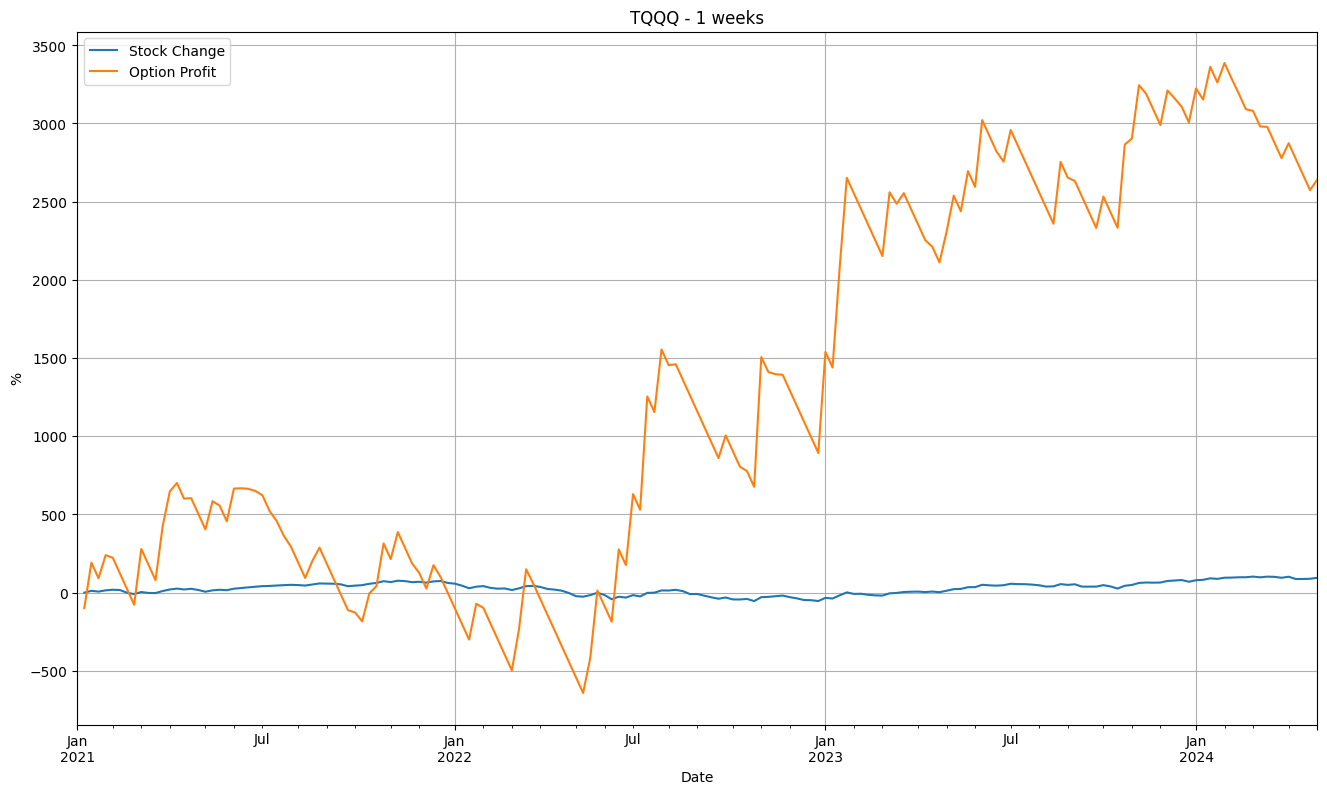

In [17]:
# Plot everything by leveraging the very powerful matplotlib package
plt.figure(figsize=(16,9))
history['Stock Change'].cumsum().plot()
history['Option Profit'].cumsum().plot()

# plt.axhline(y=0, color='k', linestyle='--')
plt.legend(loc='upper left')
plt.ylabel('%')
plt.title(f'{tickerSymbol} - {weeks} weeks')
plt.grid()
plt.show()
